In [1]:
#installing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [72]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/Users/shuvechchhasanyal/Downloads/heart.csv")

Age : Age of the patient
Sex : Sex of the patient
exang: exercise induced angina (1 = yes; 0 = no)
ca: number of major vessels (0-3)
cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)
chol : cholestoral in mg/dl fetched via BMI sensor
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved
target : 0= less chance of heart attack 1= more chance of heart attack

# DATA PREPARATION AND CLEANING

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
df.shape

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#missing values
df.isna().sum()
#no missing values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [9]:
#checking for unique counts as not understandable dtype
dict = {}
for x in list(df.columns):
    dict[x] = df[x].value_counts().shape[0]

pd.DataFrame(dict, index=["Unique Counts"]).transpose()

,Unique Counts
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [10]:
#categorical variables
cat_var=['sex','cp','fbs','restecg','slp','caa','exng','thall']
#continuous variables
cont_var=['age','trtbps','chol','thalachh','oldpeak']
#target variable
tgt_var=['output']

# Exploratory data analysis and Visualization

<AxesSubplot:title={'center':'Correlation between all variables'}>

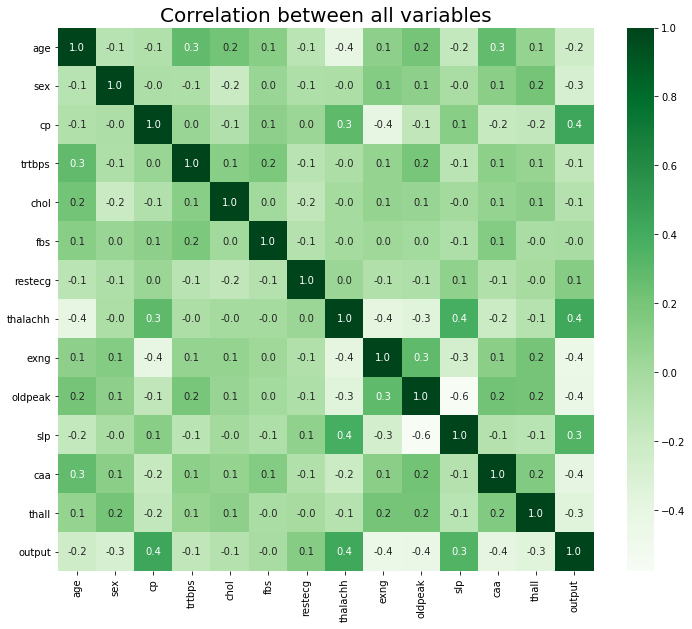

In [11]:
plt.figure(figsize=(12,10))
plt.title("Correlation between all variables",fontsize=20)
sns.heatmap(df.corr(),fmt='.1f',annot=True,cmap='Greens')

Conclusion:
    0.4-(cp,output),(thalachh,slp),(thalachh,output)
    0.3-(age,cp),(age,caa),(cp,thalachh),(exng,oldpeak),(slp,output)
    -0.4-(age,thalachh),(cp,exng),(thalachh,exng),(exng,output),(oldpeak,output),(caa,output)
    -0.6-(oldpeak,slp)

# Multivariate Analysis

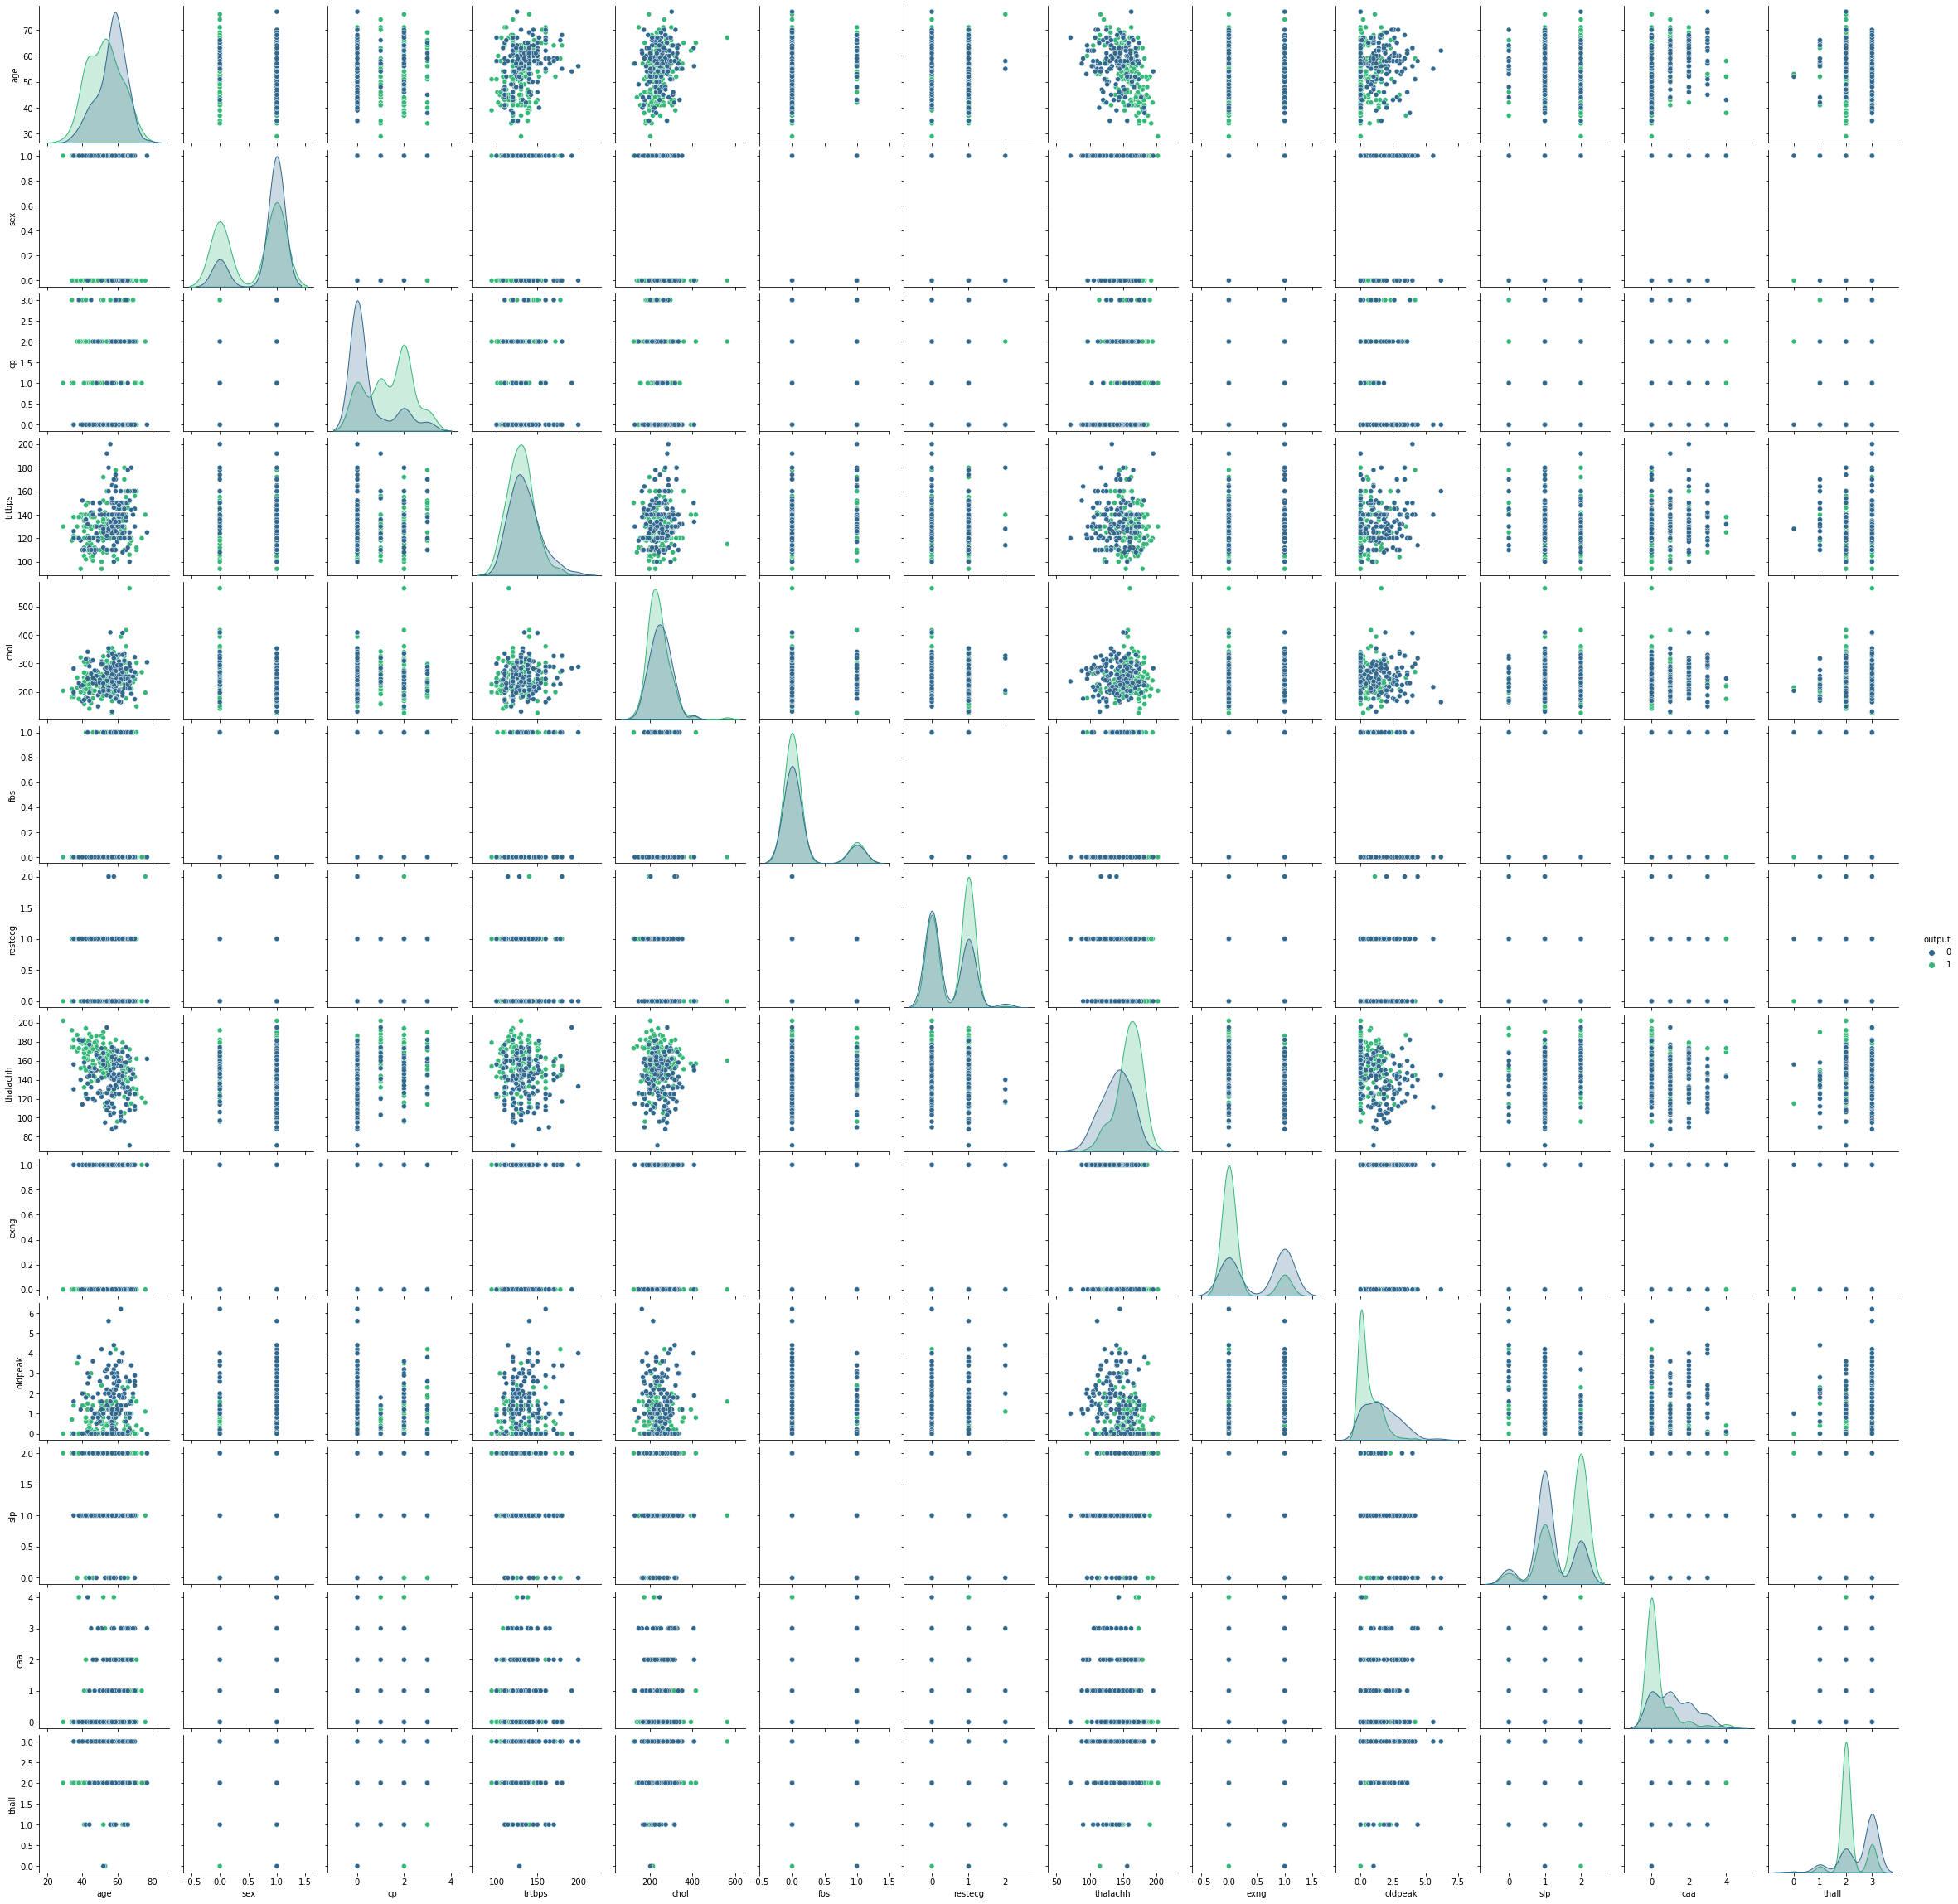

In [12]:
sns.pairplot(df,hue='output',palette='viridis')
plt.savefig("Pairplot.png")

## CREATING TRAINING AND TESTING DATASET

### Scaling data

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[cont_var]=scaler.fit_transform(df[cont_var])
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


### creating testing and training dataset

In [60]:
x=df.drop(columns='output')
y=df['output']

In [61]:
from statistics import mean

In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
acc=[]
auc=[]
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(x,y):  
    x_train, x_test = x.iloc[train_index], x.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc.append(accuracy_score(y_test,y_pred))
    auc.append(roc_auc_score(y_test,y_pred))
tab_log=pd.DataFrame({'Accuracy':acc,'AUC':auc})
tab_log
print("Mean accuracy:",mean(acc))
print("Mean AUC:",mean(auc))

Mean accuracy: 0.8248633879781421
Mean AUC: 0.8198292448292449


Feature: 0, Score: -0.54167
Feature: 1, Score: -1.44905
Feature: 2, Score: 0.81624
Feature: 3, Score: -0.88083
Feature: 4, Score: -0.52287
Feature: 5, Score: 0.53684
Feature: 6, Score: 0.44566
Feature: 7, Score: 1.22308
Feature: 8, Score: -0.96155
Feature: 9, Score: -1.25833
Feature: 10, Score: 0.92919
Feature: 11, Score: -0.93867
Feature: 12, Score: -1.00367


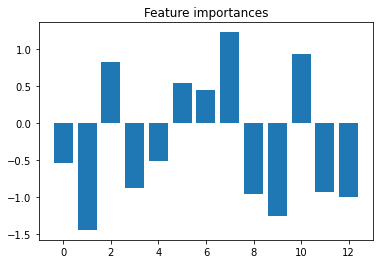

<Figure size 432x288 with 0 Axes>

In [63]:
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature importances')
plt.show()
plt.savefig('F-1.png')

### fitting a logistic regression model

In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred=lr.predict(x_test)
y_pred[0:5]

array([1, 1, 1, 1, 1])

### evaluation of logistic regression model

In [69]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.75


# XGBOOST

In [19]:
# !pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [94]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
acc_1=[]
auc_1=[]
skf = StratifiedKFold(n_splits=5, random_state=None)
params = {
            'objective':'binary:logistic',
            'max_depth': 3,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':100,'eval_metric':'auc'
        }         
           
# X is the feature set and y is the target
for train_index, test_index in skf.split(x,y):  
    x_train, x_test = x.iloc[train_index], x.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    xgb_clf = XGBClassifier(**params)
    xgb_clf.fit(x_train,y_train)
    y_pred_clf=xgb_clf.predict(x_test)
    acc_1.append(accuracy_score(y_test,y_pred_clf))
    auc_1.append(roc_auc_score(y_test,y_pred_clf))
tab_xgb=pd.DataFrame({'Accuracy':acc_1,'AUC':auc_1})
tab_xgb
print("Mean accuracy:",mean(acc_1))
print("Mean AUC:",mean(auc_1))

Mean accuracy: 0.8381967213114754
Mean AUC: 0.8327561327561328


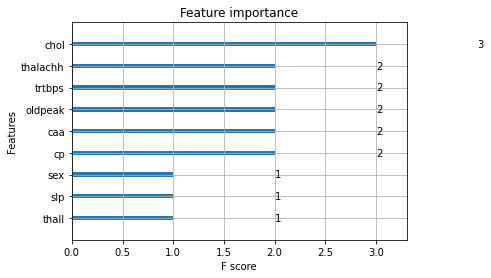

<Figure size 1152x864 with 0 Axes>

In [25]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

In [21]:
import xgboost as xgb

# Decision tree

In [65]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
acc_2=[]
auc_2=[]
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(x,y):  
    x_train, x_test = x.iloc[train_index], x.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    decTree = DecisionTreeClassifier(max_depth=6)
    decTree.fit(x_train,y_train)
    y_pred_decTree = decTree.predict(x_test)
    acc_2.append(accuracy_score(y_test,y_pred_decTree))
    auc_2.append(roc_auc_score(y_test,y_pred_decTree))
tab_dectree=pd.DataFrame({'Accuracy':acc_2,'AUC':auc_2})
tab_dectree
print("Mean accuracy:",mean(acc_2))
print("Mean AUC:",mean(auc_2))

Mean accuracy: 0.7622404371584699
Mean AUC: 0.7578042328042328


Feature: 0, Score: 0.08481
Feature: 1, Score: 0.01132
Feature: 2, Score: 0.31082
Feature: 3, Score: 0.02570
Feature: 4, Score: 0.03449
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.02955
Feature: 7, Score: 0.06193
Feature: 8, Score: 0.01416
Feature: 9, Score: 0.10382
Feature: 10, Score: 0.02601
Feature: 11, Score: 0.15246
Feature: 12, Score: 0.14495


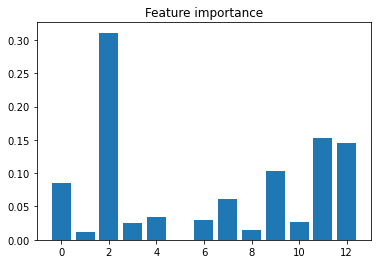

In [67]:
importance = decTree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature importance')
plt.show()


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
acc_3=[]
auc_3=[]
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(x,y):  
    x_train, x_test = x.iloc[train_index], x.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf = RandomForestClassifier(n_estimators=500)
    rf.fit(x_train,y_train)
    y_pred_rf = rf.predict(x_test)
    acc_3.append(accuracy_score(y_test,y_pred_rf))
    auc_3.append(roc_auc_score(y_test,y_pred_rf))
tab_rf=pd.DataFrame({'Accuracy':acc_3,'AUC':auc_3})
tab_rf
print("Mean accuracy:",mean(acc_3))
print("Mean AUC:",mean(auc_3))

Mean accuracy: 0.8314754098360656
Mean AUC: 0.8276455026455027


Feature: age, Score: 0.07584
Feature: sex, Score: 0.03541
Feature: cp, Score: 0.14144
Feature: trtbps, Score: 0.07217
Feature: chol, Score: 0.07834
Feature: fbs, Score: 0.00986
Feature: restecg, Score: 0.02117
Feature: thalachh, Score: 0.12220
Feature: exng, Score: 0.05243
Feature: oldpeak, Score: 0.10955
Feature: slp, Score: 0.05891
Feature: caa, Score: 0.11222
Feature: thall, Score: 0.11046


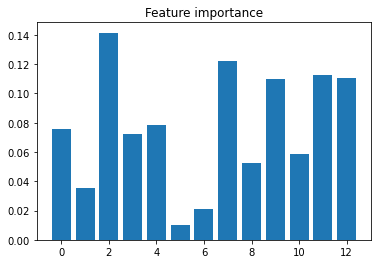

In [99]:
# Using Random forest classifier
names=df.columns
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
#Find the score of each feature in model and drop the features with low scores
f_imp = rf.feature_importances_
for i,v in enumerate(f_imp):
    print('Feature: %s, Score: %.5f' % (names[i],v))
plt.bar([x for x in range(len(f_imp))],f_imp)
plt.title('Feature importance')
plt.show()

